# Netflix Dataset Analysis - Content Trends Analysis for Strategic Recommendations

**Author:** Sujal Naik  
**Dataset:** Netflix Dataset.csv  
**Objective:** Analyze Netflix content trends to provide strategic recommendations

---

## Table of Contents
1. [Data Loading and Preprocessing](#1-data-loading-and-preprocessing)
2. [Exploratory Data Analysis](#2-exploratory-data-analysis)
3. [Movies vs TV Shows Analysis](#3-movies-vs-tv-shows-analysis)
4. [Genre Analysis](#4-genre-analysis)
5. [Country-wise Analysis](#5-country-wise-analysis)
6. [Rating Analysis](#6-rating-analysis)
7. [Duration Analysis](#7-duration-analysis)
8. [Comprehensive Dashboard](#8-comprehensive-dashboard)
9. [Strategic Recommendations](#9-strategic-recommendations)


## 1. Data Loading and Preprocessing


In [1]:
!pip install pandas numpy matplotlib seaborn plotly


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("=" * 80)
print("NETFLIX DATASET ANALYSIS - CONTENT TRENDS ANALYSIS")
print("=" * 80)


NETFLIX DATASET ANALYSIS - CONTENT TRENDS ANALYSIS


In [3]:
# Load the dataset
# Note: Update the file path according to your Google Colab upload location
df = pd.read_csv('/content/Netflix_Dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


Dataset shape: (7789, 11)
Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

First 5 rows:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    

Missing values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


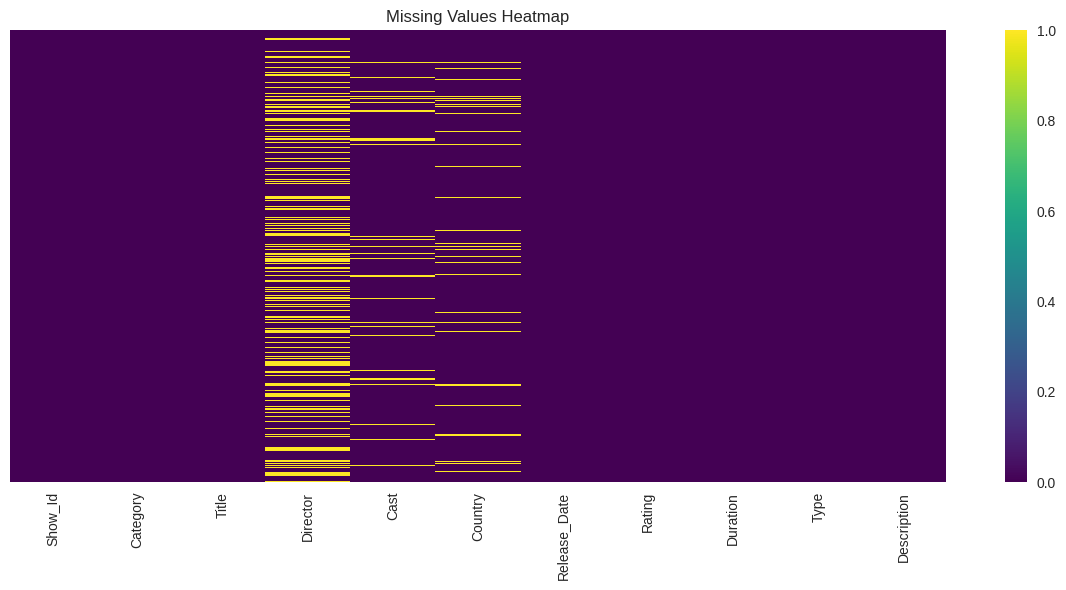

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


In [5]:
# Data preprocessing
print("Data Preprocessing:")
print("-" * 50)

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

# Clean and process Duration column
def clean_duration(duration):
    if pd.isna(duration):
        return None
    if 'Season' in str(duration):
        return int(str(duration).split()[0])
    elif 'min' in str(duration):
        return int(str(duration).split()[0])
    return None

df['Duration_Clean'] = df['Duration'].apply(clean_duration)

# Clean Type column (genres)
df['Type_Clean'] = df['Type'].fillna('Unknown')

# Clean Country column
df['Country_Clean'] = df['Country'].fillna('Unknown')

# Clean Rating column
df['Rating_Clean'] = df['Rating'].fillna('Unknown')

print("Data preprocessing completed!")
print(f"\nProcessed dataset shape: {df.shape}")


Data Preprocessing:
--------------------------------------------------
Data preprocessing completed!

Processed dataset shape: (7789, 16)


## 2. Exploratory Data Analysis


In [6]:
# Basic statistics
print("Basic Statistics:")
print(f"Total records: {len(df)}")
print(f"Date range: {df['Release_Year'].min()} - {df['Release_Year'].max()}")
print(f"Unique countries: {df['Country_Clean'].nunique()}")
print(f"Unique ratings: {df['Rating_Clean'].nunique()}")

# Display basic statistics
print("\nDataset Summary:")
print(df.describe(include='all'))


Basic Statistics:
Total records: 7789
Date range: 2008.0 - 2021.0
Unique countries: 682
Unique ratings: 15

Dataset Summary:
       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   
mean       NaN      NaN                NaN                     NaN   
min        NaN      NaN                NaN                     NaN   
25%        NaN      NaN                NaN                     NaN   
50%        NaN      NaN                NaN                     NaN   
75%        NaN      NaN                NaN                     NaN   
max        NaN      NaN                NaN                     NaN   
std        NaN      NaN                NaN                     NaN   

                      Cast        

## 3. Movies vs TV Shows Analysis


In [7]:
# Overall distribution
category_dist = df['Category'].value_counts()
print("Overall Category Distribution:")
print(category_dist)
print(f"\nMovies: {category_dist['Movie']} ({category_dist['Movie']/len(df)*100:.1f}%)")
print(f"TV Shows: {category_dist['TV Show']} ({category_dist['TV Show']/len(df)*100:.1f}%)")


Overall Category Distribution:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Movies: 5379 (69.1%)
TV Shows: 2410 (30.9%)


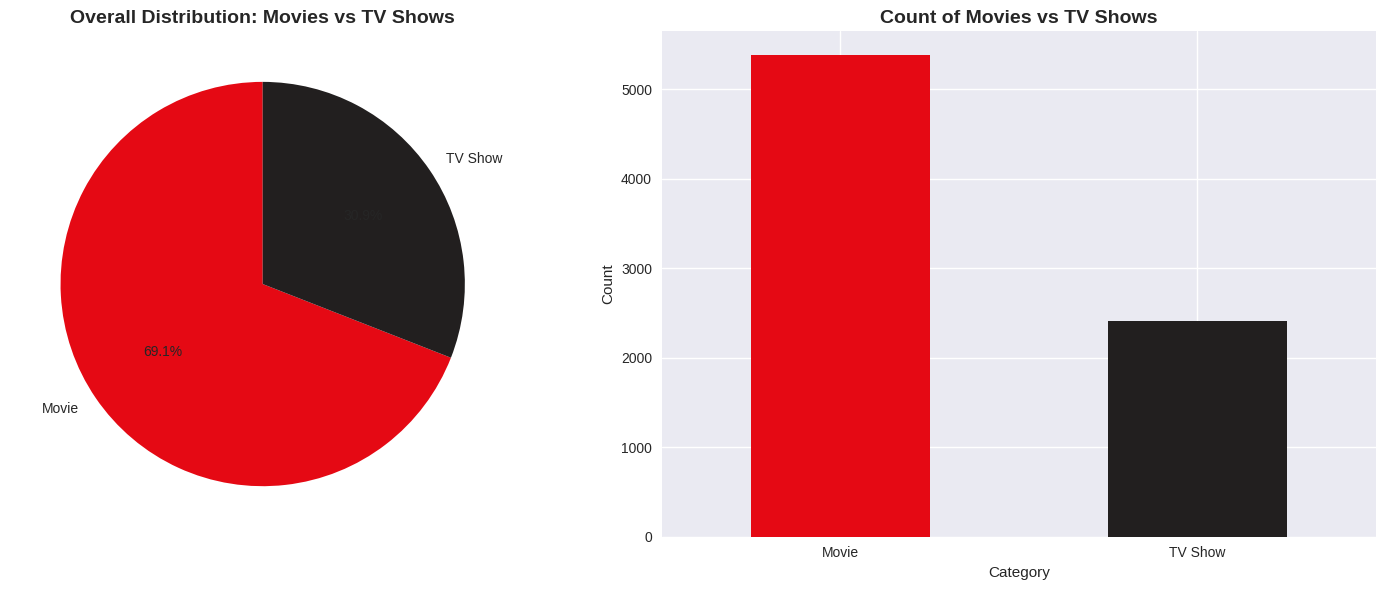

In [8]:
# Create visualization for category distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
axes[0].pie(category_dist.values, labels=category_dist.index, autopct='%1.1f%%', startangle=90,
            colors=['#E50914', '#221F1F'])
axes[0].set_title('Overall Distribution: Movies vs TV Shows', fontsize=14, fontweight='bold')

# Bar chart
category_dist.plot(kind='bar', ax=axes[1], color=['#E50914', '#221F1F'])
axes[1].set_title('Count of Movies vs TV Shows', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Year-wise Category Distribution (Last 10 years):
Category      Movie  TV Show
Release_Year                
2012.0            3        0
2013.0            6        4
2014.0           19        5
2015.0           58       21
2016.0          258      174
2017.0          864      337
2018.0         1255      406
2019.0         1498      639
2020.0         1313      696
2021.0           88       29


<Figure size 1500x800 with 0 Axes>

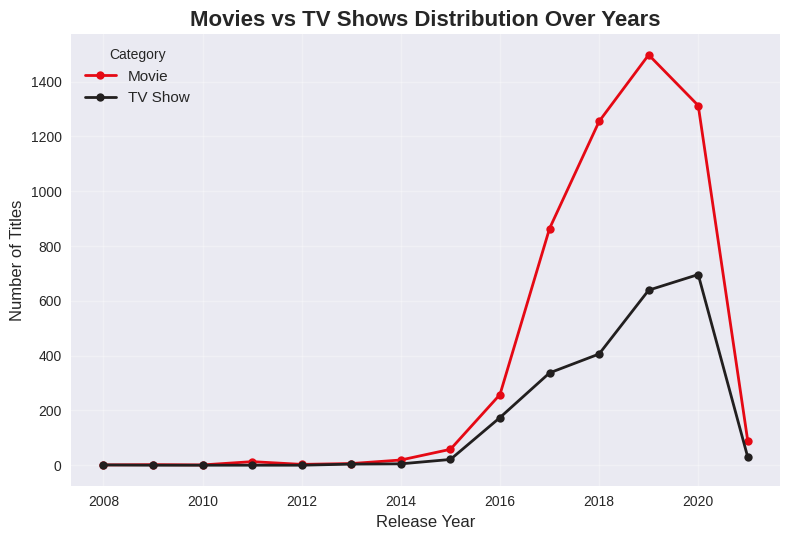

In [9]:
# Year-wise analysis
print("Year-wise Category Distribution (Last 10 years):")
yearly_dist = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)
print(yearly_dist.tail(10))

# Create year-wise trend visualization
plt.figure(figsize=(15, 8))
yearly_dist.plot(kind='line', marker='o', linewidth=2, markersize=6,
                 color=['#E50914', '#221F1F'])
plt.title('Movies vs TV Shows Distribution Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Category', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Genre Analysis


In [10]:
# Analyze genres (Type column)
# Split multiple genres and create a list
all_genres = []
for genres in df['Type_Clean'].dropna():
    if isinstance(genres, str):
        genre_list = [genre.strip() for genre in genres.split(',')]
        all_genres.extend(genre_list)

# Count genre frequency
genre_counts = pd.Series(all_genres).value_counts()
print(f"Total unique genres: {len(genre_counts)}")
print(f"\nTop 20 Most Common Genres:")
print(genre_counts.head(20))


Total unique genres: 42

Top 20 Most Common Genres:
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  525
Thrillers                    492
Crime TV Shows               427
Kids' TV                     414
Docuseries                   353
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             232
Name: count, dtype: int64


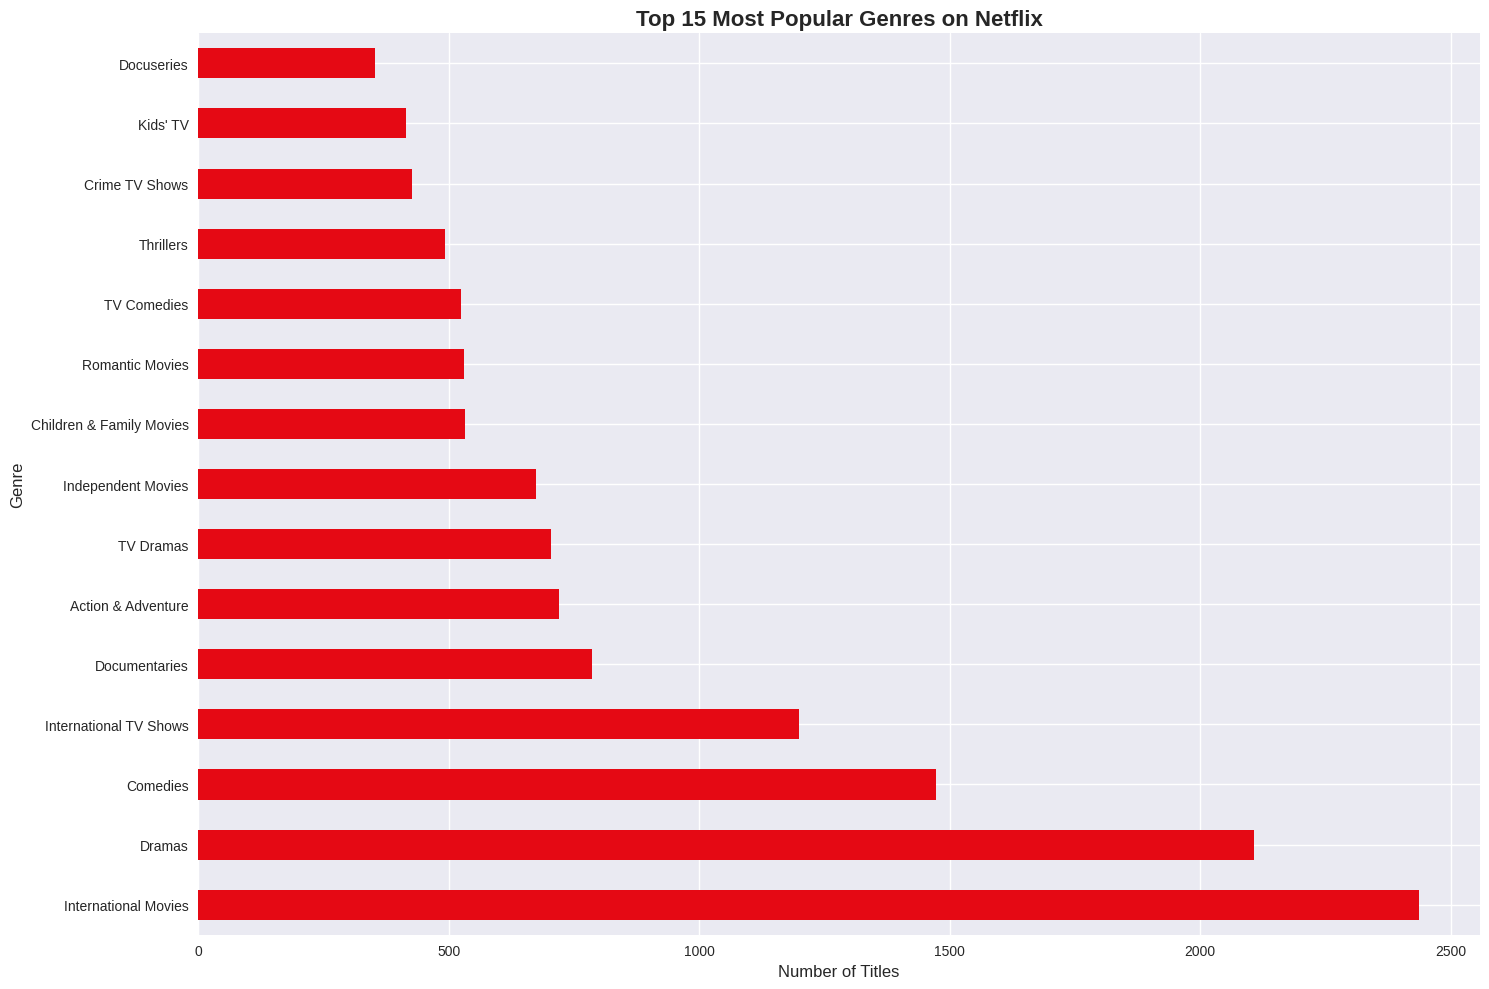

In [11]:
# Create genre visualization
plt.figure(figsize=(15, 10))
top_genres = genre_counts.head(15)
top_genres.plot(kind='barh', color='#E50914')
plt.title('Top 15 Most Popular Genres on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()


Analyzing genre trends over years...


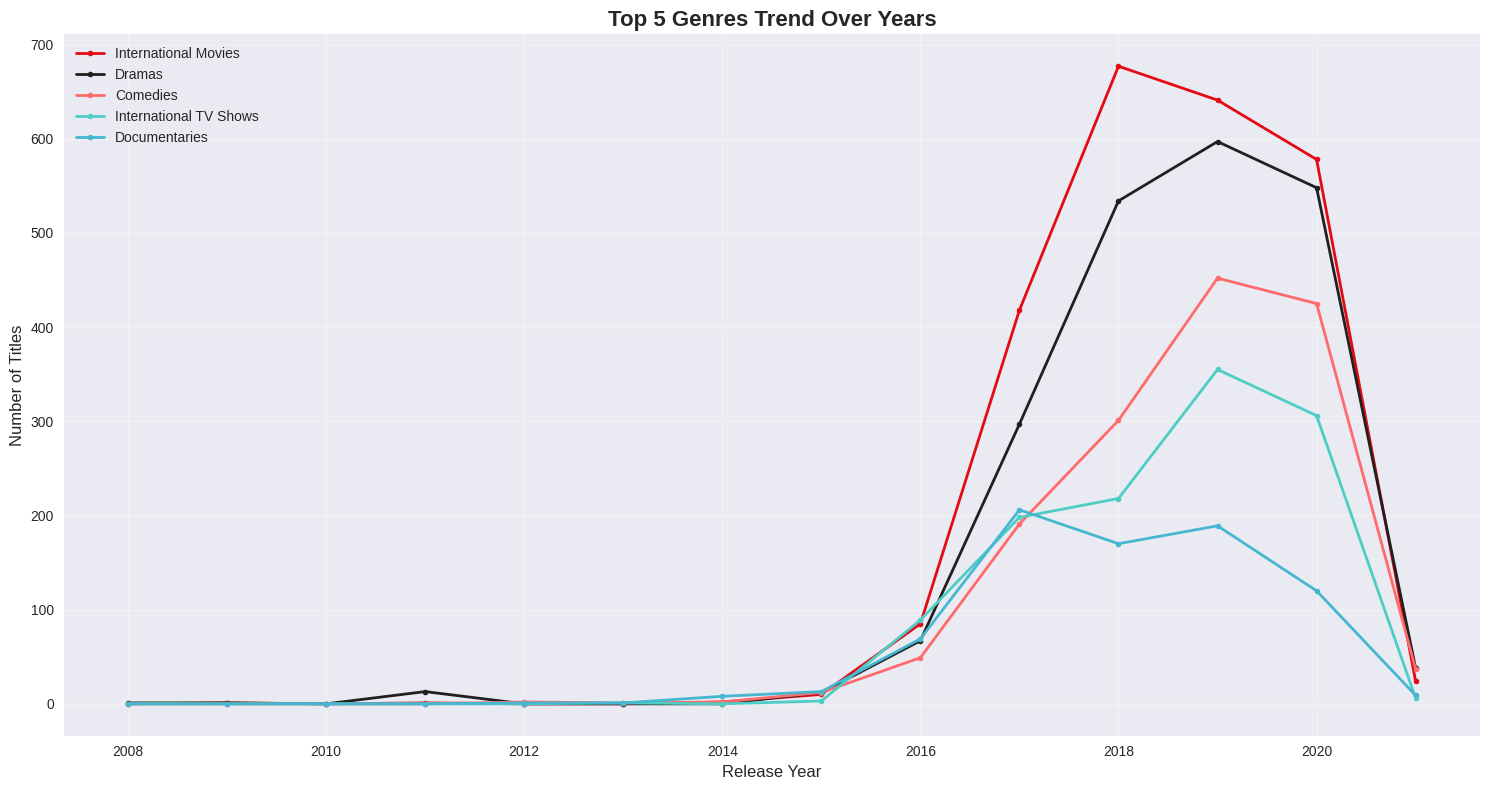

In [12]:
# Genre trends over years
print("Analyzing genre trends over years...")
# Create a more detailed genre analysis
genre_trends = {}
for year in sorted(df['Release_Year'].dropna().unique()):
    year_data = df[df['Release_Year'] == year]
    year_genres = []
    for genres in year_data['Type_Clean'].dropna():
        if isinstance(genres, str):
            genre_list = [genre.strip() for genre in genres.split(',')]
            year_genres.extend(genre_list)
    genre_trends[year] = pd.Series(year_genres).value_counts()

# Plot top 5 genres over years
top_5_genres = genre_counts.head(5).index
plt.figure(figsize=(15, 8))

colors = ['#E50914', '#221F1F', '#FF6B6B', '#4ECDC4', '#45B7D1']
for i, genre in enumerate(top_5_genres):
    years = []
    counts = []
    for year in sorted(genre_trends.keys()):
        if genre in genre_trends[year]:
            years.append(year)
            counts.append(genre_trends[year][genre])
        else:
            years.append(year)
            counts.append(0)

    plt.plot(years, counts, marker='o', label=genre, linewidth=2, markersize=4, color=colors[i])

plt.title('Top 5 Genres Trend Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Country-wise Analysis


In [13]:
# Analyze countries
all_countries = []
for countries in df['Country_Clean'].dropna():
    if isinstance(countries, str):
        country_list = [country.strip() for country in countries.split(',')]
        all_countries.extend(country_list)

country_counts = pd.Series(all_countries).value_counts()
print(f"Total unique countries: {len(country_counts)}")
print(f"\nTop 20 Countries by Content Contribution:")
print(country_counts.head(20))


Total unique countries: 119

Top 20 Countries by Content Contribution:
United States     3298
India              990
United Kingdom     723
Unknown            507
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          144
Egypt              110
Turkey             108
Hong Kong          102
Italy               90
Brazil              88
Taiwan              85
Belgium             85
Name: count, dtype: int64


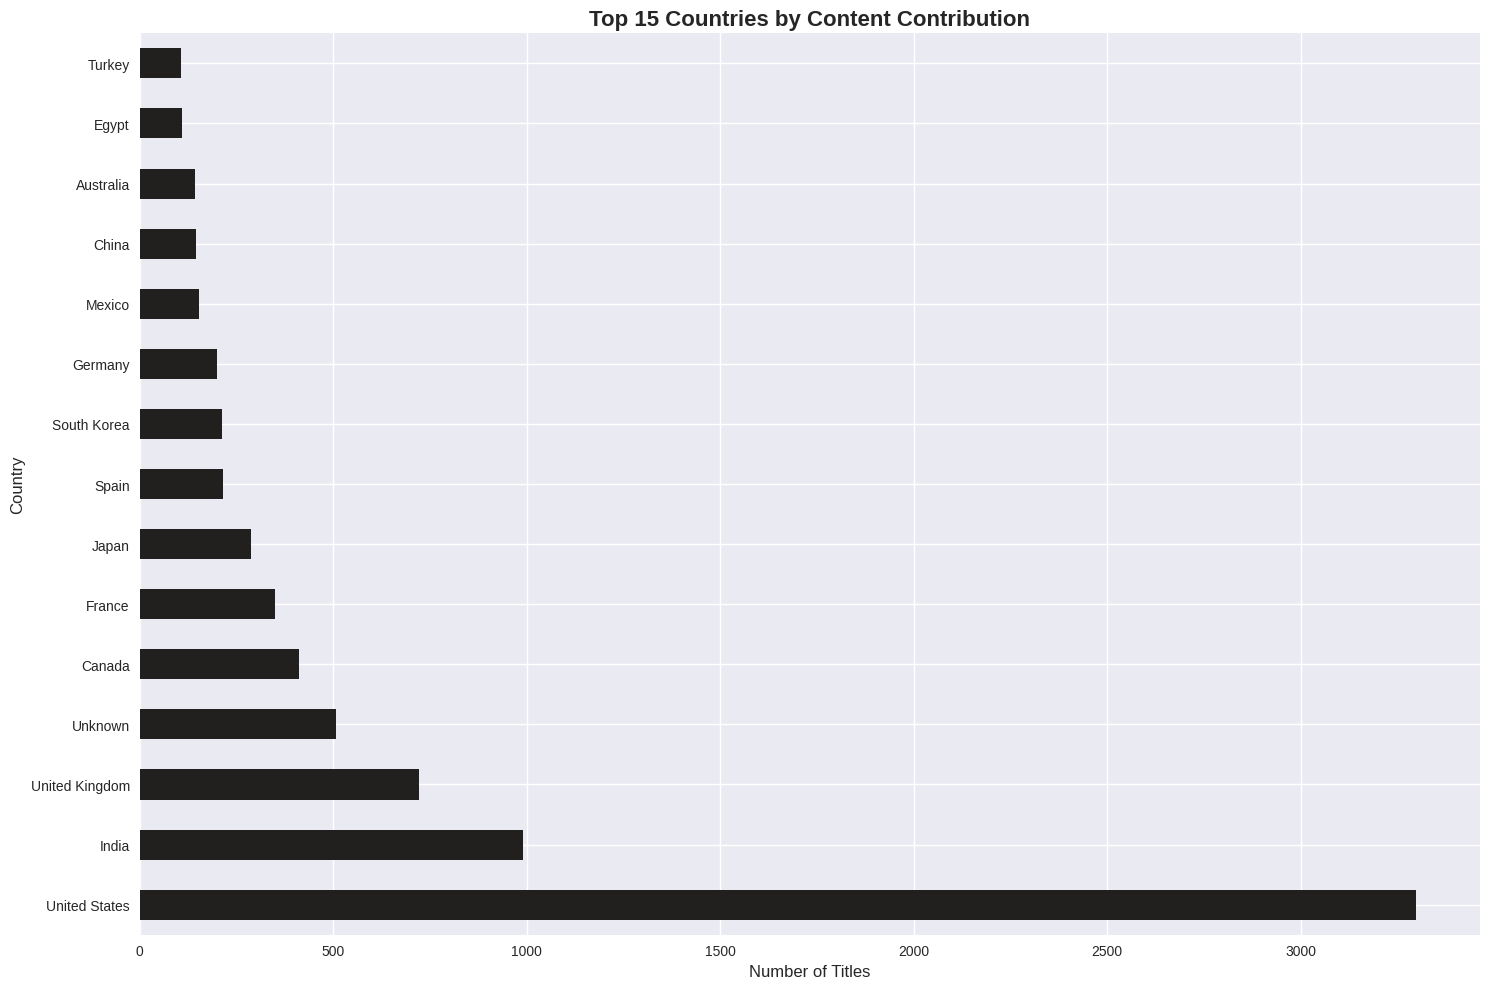

In [14]:
# Create country visualization
plt.figure(figsize=(15, 10))
top_countries = country_counts.head(15)
top_countries.plot(kind='barh', color='#221F1F')
plt.title('Top 15 Countries by Content Contribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


Country-wise Category Distribution (Top 10 countries):
Category        Movie  TV Show
Country_Clean                 
Canada            118       59
France             69       46
Germany            42       19
India             852       71
Japan              69      157
South Korea        36      147
Spain              89       45
United Kingdom    193      204
United States    1851      705
Unknown           230      277


<Figure size 1500x800 with 0 Axes>

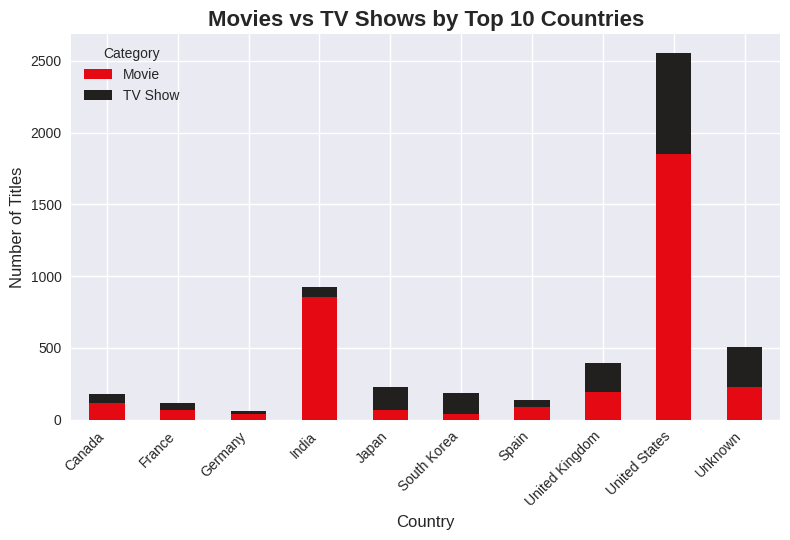

In [15]:
# Country vs Category analysis
print("Country-wise Category Distribution (Top 10 countries):")
top_10_countries = country_counts.head(10).index
country_category = df[df['Country_Clean'].isin(top_10_countries)]
country_cat_dist = country_category.groupby(['Country_Clean', 'Category']).size().unstack(fill_value=0)
print(country_cat_dist)

# Visualization for country vs category
plt.figure(figsize=(15, 8))
country_cat_dist.plot(kind='bar', stacked=True, color=['#E50914', '#221F1F'])
plt.title('Movies vs TV Shows by Top 10 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. Rating Analysis


Rating Distribution:
Rating_Clean
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
Unknown        7
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


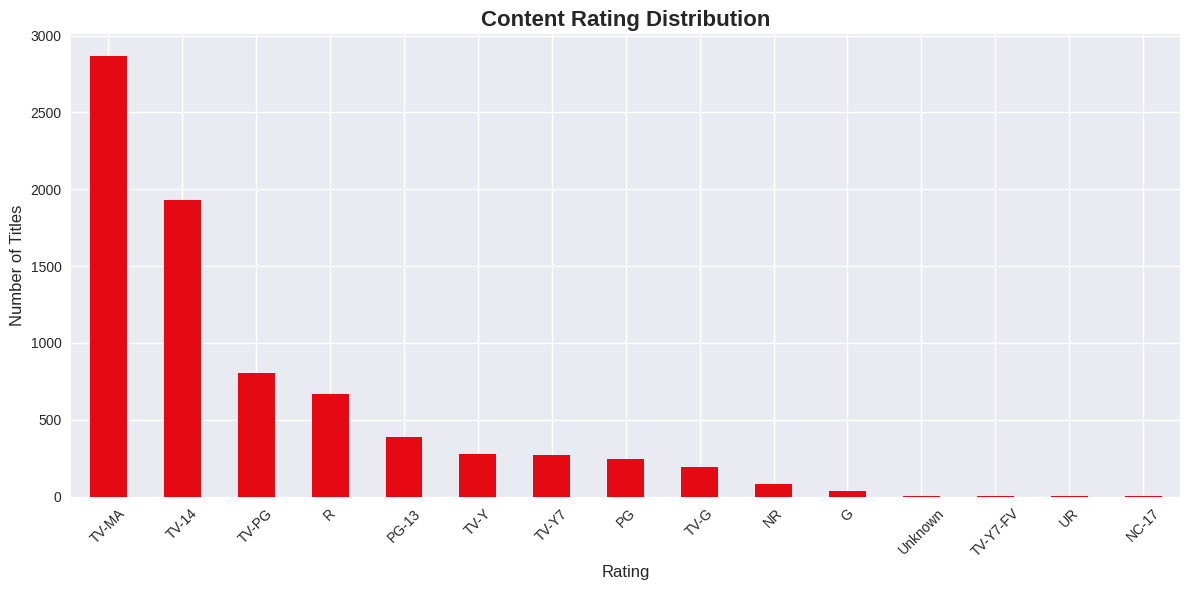

In [16]:
# Rating analysis
rating_dist = df['Rating_Clean'].value_counts()
print("Rating Distribution:")
print(rating_dist)

# Rating visualization
plt.figure(figsize=(12, 6))
rating_dist.plot(kind='bar', color='#E50914')
plt.title('Content Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Rating vs Category Distribution:
Category      Movie  TV Show
Rating_Clean                
G                39        0
NC-17             3        0
NR               79        5
PG              247        0
PG-13           386        0
R               663        2
TV-14          1272      659
TV-G            111       83
TV-MA          1847     1018
TV-PG           505      301
TV-Y            117      163
TV-Y7            95      176
TV-Y7-FV          5        1
UR                5        0
Unknown           5        2


<Figure size 1200x800 with 0 Axes>

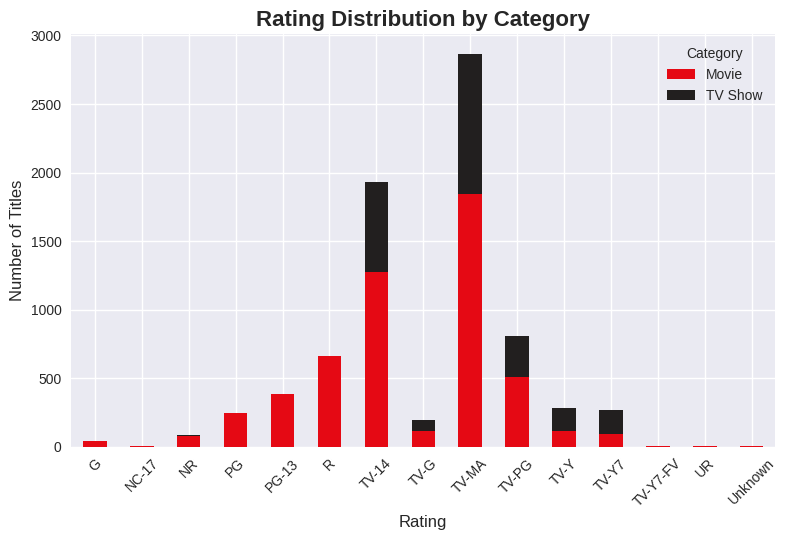

In [17]:
# Rating vs Category analysis
rating_category = df.groupby(['Rating_Clean', 'Category']).size().unstack(fill_value=0)
print("Rating vs Category Distribution:")
print(rating_category)

# Visualization
plt.figure(figsize=(12, 8))
rating_category.plot(kind='bar', stacked=True, color=['#E50914', '#221F1F'])
plt.title('Rating Distribution by Category', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Duration Analysis


Movies Duration Statistics (in minutes):
count    5379.000000
mean       99.306563
std        28.525684
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: Duration_Clean, dtype: float64


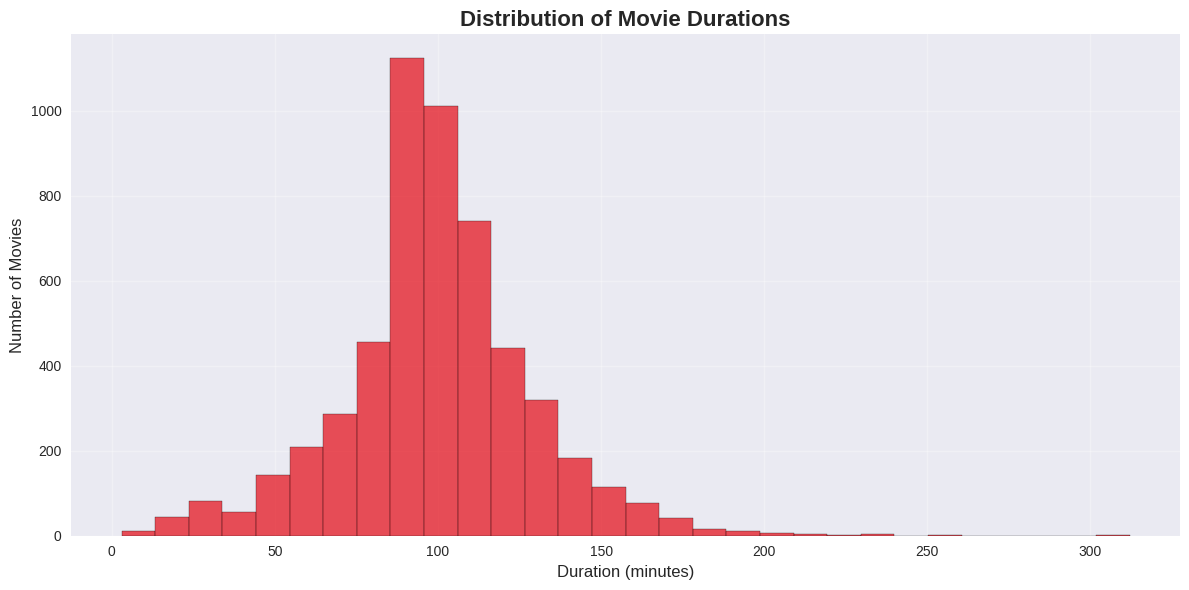

In [18]:
# Movies duration analysis
movies = df[df['Category'] == 'Movie'].copy()
movies_with_duration = movies.dropna(subset=['Duration_Clean'])

if len(movies_with_duration) > 0:
    print(f"Movies Duration Statistics (in minutes):")
    print(movies_with_duration['Duration_Clean'].describe())

    # Duration distribution for movies
    plt.figure(figsize=(12, 6))
    plt.hist(movies_with_duration['Duration_Clean'], bins=30, color='#E50914', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Movie Durations', fontsize=16, fontweight='bold')
    plt.xlabel('Duration (minutes)', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No movie duration data available")


TV Shows Seasons Statistics:
count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: Duration_Clean, dtype: float64


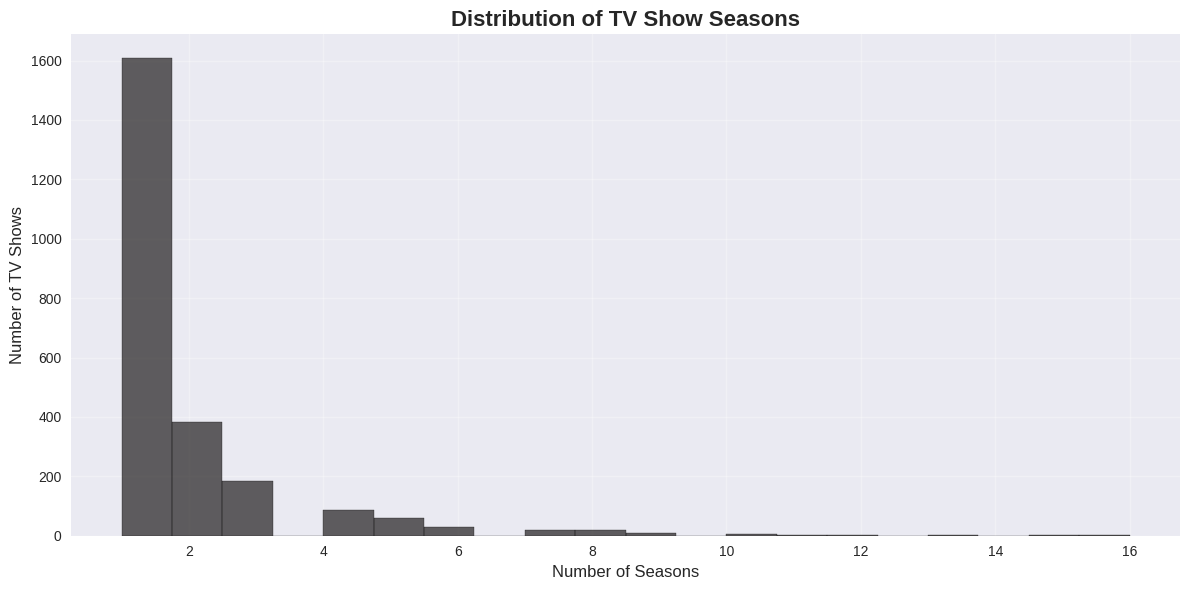

In [19]:
# TV Shows seasons analysis
tv_shows = df[df['Category'] == 'TV Show'].copy()
tv_shows_with_seasons = tv_shows.dropna(subset=['Duration_Clean'])

if len(tv_shows_with_seasons) > 0:
    print(f"TV Shows Seasons Statistics:")
    print(tv_shows_with_seasons['Duration_Clean'].describe())

    # Seasons distribution for TV shows
    plt.figure(figsize=(12, 6))
    plt.hist(tv_shows_with_seasons['Duration_Clean'], bins=20, color='#221F1F', alpha=0.7, edgecolor='black')
    plt.title('Distribution of TV Show Seasons', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Seasons', fontsize=12)
    plt.ylabel('Number of TV Shows', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No TV show duration data available")


## 8. Comprehensive Dashboard


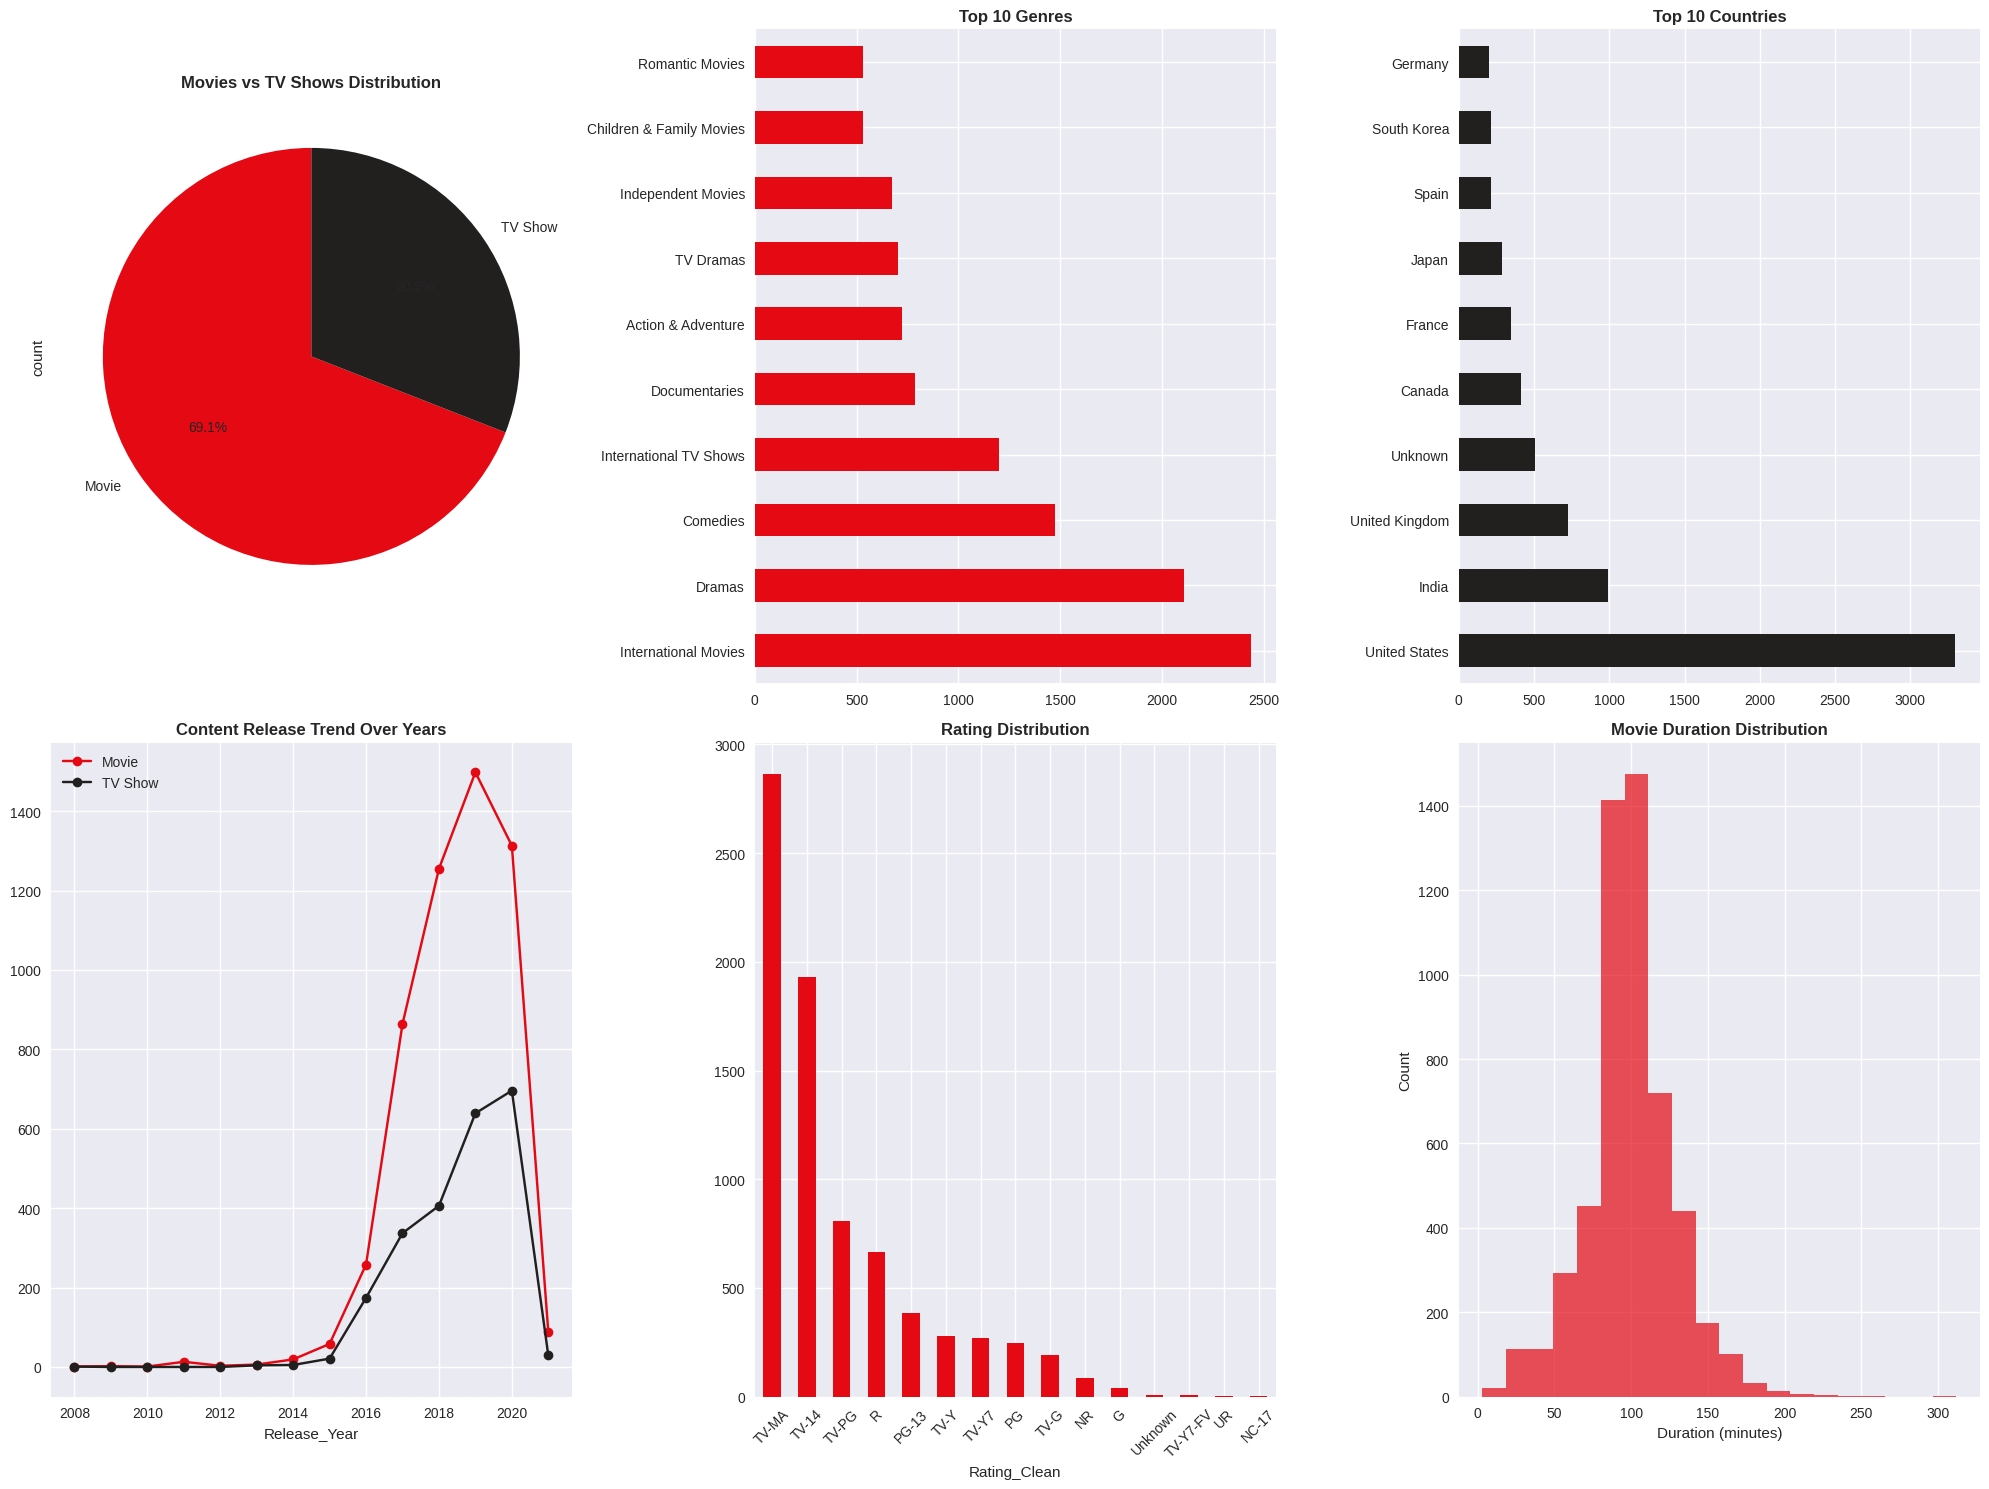

In [20]:
# Create a comprehensive dashboard
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# 1. Category distribution
category_dist.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90,
                   colors=['#E50914', '#221F1F'])
axes[0,0].set_title('Movies vs TV Shows Distribution', fontweight='bold')

# 2. Top genres
top_genres = genre_counts.head(10)
top_genres.plot(kind='barh', ax=axes[0,1], color='#E50914')
axes[0,1].set_title('Top 10 Genres', fontweight='bold')

# 3. Top countries
top_countries = country_counts.head(10)
top_countries.plot(kind='barh', ax=axes[0,2], color='#221F1F')
axes[0,2].set_title('Top 10 Countries', fontweight='bold')

# 4. Yearly trend
yearly_dist.plot(kind='line', ax=axes[1,0], marker='o', color=['#E50914', '#221F1F'])
axes[1,0].set_title('Content Release Trend Over Years', fontweight='bold')
axes[1,0].legend()

# 5. Rating distribution
rating_dist.plot(kind='bar', ax=axes[1,1], color='#E50914')
axes[1,1].set_title('Rating Distribution', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Duration analysis
if len(movies_with_duration) > 0:
    axes[1,2].hist(movies_with_duration['Duration_Clean'], bins=20, color='#E50914', alpha=0.7)
    axes[1,2].set_title('Movie Duration Distribution', fontweight='bold')
    axes[1,2].set_xlabel('Duration (minutes)')
    axes[1,2].set_ylabel('Count')
else:
    axes[1,2].text(0.5, 0.5, 'No duration data', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Movie Duration Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


## 9. Strategic Recommendations


In [21]:
# Generate summary statistics
summary_stats = {
    'Total_Titles': len(df),
    'Movies_Count': category_dist['Movie'],
    'TV_Shows_Count': category_dist['TV Show'],
    'Unique_Countries': df['Country_Clean'].nunique(),
    'Unique_Genres': len(genre_counts),
    'Date_Range': f"{df['Release_Year'].min()}-{df['Release_Year'].max()}",
    'Top_Genre': genre_counts.index[0],
    'Top_Country': country_counts.index[0],
    'Most_Common_Rating': rating_dist.index[0]
}

print("SUMMARY STATISTICS:")
print("=" * 50)
for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\n" + "=" * 80)
print("STRATEGIC RECOMMENDATIONS")
print("=" * 80)

print("\n1. CONTENT STRATEGY:")
print(f"   - Movies dominate with {category_dist['Movie']} titles ({category_dist['Movie']/len(df)*100:.1f}%)")
print(f"   - TV Shows have {category_dist['TV Show']} titles ({category_dist['TV Show']/len(df)*100:.1f}%)")
print("   - Consider increasing TV Show production for better audience retention")

print("\n2. GENRE FOCUS:")
print("   - Top performing genres:")
for i, (genre, count) in enumerate(genre_counts.head(5).items(), 1):
    print(f"     {i}. {genre}: {count} titles")
print("   - Focus on these high-performing genres for future content")

print("\n3. GLOBAL EXPANSION:")
print("   - Top content contributing countries:")
for i, (country, count) in enumerate(country_counts.head(5).items(), 1):
    print(f"     {i}. {country}: {count} titles")
print("   - Consider expanding content from underrepresented regions")

print("\n4. CONTENT RATING STRATEGY:")
print("   - Most common ratings:")
for i, (rating, count) in enumerate(rating_dist.head(3).items(), 1):
    print(f"     {i}. {rating}: {count} titles")
print("   - Balance content across different age groups")

print("\n5. RELEASE TIMING:")
recent_years = df[df['Release_Year'] >= 2015]['Release_Year'].value_counts().sort_index()
print("   - Recent content trends (2015-2021):")
for year, count in recent_years.items():
    print(f"     {year}: {count} titles")

print("\n6. DURATION OPTIMIZATION:")
if len(movies_with_duration) > 0:
    avg_movie_duration = movies_with_duration['Duration_Clean'].mean()
    print(f"   - Average movie duration: {avg_movie_duration:.1f} minutes")
    print("   - Consider optimal duration for audience engagement")

if len(tv_shows_with_seasons) > 0:
    avg_seasons = tv_shows_with_seasons['Duration_Clean'].mean()
    print(f"   - Average TV show seasons: {avg_seasons:.1f} seasons")
    print("   - Plan for multi-season content development")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 80)


SUMMARY STATISTICS:
Total_Titles: 7789
Movies_Count: 5379
TV_Shows_Count: 2410
Unique_Countries: 682
Unique_Genres: 42
Date_Range: 2008.0-2021.0
Top_Genre: International Movies
Top_Country: United States
Most_Common_Rating: TV-MA

STRATEGIC RECOMMENDATIONS

1. CONTENT STRATEGY:
   - Movies dominate with 5379 titles (69.1%)
   - TV Shows have 2410 titles (30.9%)
   - Consider increasing TV Show production for better audience retention

2. GENRE FOCUS:
   - Top performing genres:
     1. International Movies: 2437 titles
     2. Dramas: 2108 titles
     3. Comedies: 1472 titles
     4. International TV Shows: 1199 titles
     5. Documentaries: 786 titles
   - Focus on these high-performing genres for future content

3. GLOBAL EXPANSION:
   - Top content contributing countries:
     1. United States: 3298 titles
     2. India: 990 titles
     3. United Kingdom: 723 titles
     4. Unknown: 507 titles
     5. Canada: 412 titles
   - Consider expanding content from underrepresented regions



## Additional Analysis - Interactive Visualizations


In [23]:
# Interactive plotly visualizations
print("Creating interactive visualizations...")

# Interactive genre distribution
fig = px.pie(values=category_dist.values, names=category_dist.index,
              title="Movies vs TV Shows Distribution",
              color_discrete_sequence=['#E50914', '#221F1F'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Interactive country analysis
fig = px.bar(x=country_counts.head(15).values, y=country_counts.head(15).index,
             orientation='h', title="Top 15 Countries by Content Contribution",
             color=country_counts.head(15).values, color_continuous_scale='Reds')
fig.update_layout(xaxis_title="Number of Titles", yaxis_title="Country")
fig.show()

# Interactive genre trends over time
genre_trend_df = pd.DataFrame(genre_trends).fillna(0)
top_5_genres = genre_counts.head(5).index

fig = go.Figure()
for genre in top_5_genres:
    fig.add_trace(go.Scatter(x=genre_trend_df.columns, y=genre_trend_df.loc[genre],
                            mode='lines+markers', name=genre))

fig.update_layout(title="Top 5 Genres Trend Over Years",
                  xaxis_title="Release Year",
                  yaxis_title="Number of Titles")
fig.show()

print("Interactive visualizations completed!")

Creating interactive visualizations...


Interactive visualizations completed!


## Conclusion

This comprehensive analysis of the Netflix dataset provides valuable insights into content trends and strategic recommendations. The analysis covers:

1. **Content Distribution**: Understanding the balance between Movies and TV Shows
2. **Genre Analysis**: Identifying popular and trending genres
3. **Global Reach**: Analyzing country-wise content contributions
4. **Rating Strategy**: Understanding content rating distribution
5. **Duration Optimization**: Analyzing content length patterns
6. **Strategic Recommendations**: Data-driven insights for business decisions

These insights can help Netflix make informed decisions about content acquisition, production, and global expansion strategies.

---

**Note**: Make sure to upload your `Netflix Dataset.csv` file to Google Colab and update the file path in the data loading cell if needed.

### Instructions for Google Colab:

1. **Upload the dataset:**
   - Upload `Netflix Dataset.csv` to your Google Colab environment
   - The code expects it at `/content/Netflix Dataset.csv`

2. **Install required libraries:**
   ```python
   !pip install plotly
   ```

3. **Run all cells:**
   - Execute each cell in sequence
   - The analysis will generate comprehensive visualizations and insights

### Key Features of this Analysis:

- **Comprehensive EDA**: Complete exploratory data analysis
- **Multiple Visualizations**: Static and interactive charts
- **Strategic Insights**: Business recommendations based on data
- **Professional Format**: Well-structured notebook with clear sections
- **Google Colab Ready**: Optimized for cloud execution
